<a href="https://colab.research.google.com/github/francesco-source/Machine-Learning/blob/main/Clustering_exam_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering exam simulation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid,GridSearchCV
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.metrics import silhouette_score,accuracy_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler ,OneHotEncoder, OrdinalEncoder
from sklearn.metrics.cluster import pair_confusion_matrix
random_state = 42

## 1. The boxplot of the attributes and comment on remarkable situations, if any

In [3]:
data = pd.read_csv("lab_exercise.csv",header = None)
data.head()

,0,1,2,3
0,0.548814,-4.893751,0.365316,0.715189
1,0.602763,-0.387057,1.164867,0.544883
2,0.423655,-10.844898,-7.553523,0.645894
3,0.437587,1.975564,-1.274422,0.891773
4,0.963663,-4.054276,0.064053,0.383442


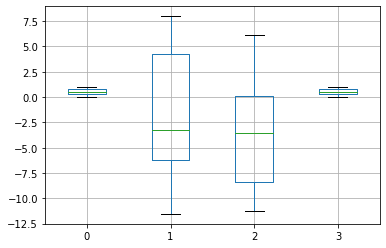

In [4]:
data.boxplot()

The data on 0 and 3 are really narrow respect with the 1 and 2. I should do a scaling, like for example a MinMaxScaling

In [8]:
mms = MinMaxScaler()
X = mms.fit_transform(data)
df = pd.DataFrame(X, columns = data.columns)
df.head()

,0,1,2,3
0,0.548542,0.340616,0.669148,0.715194
1,0.602530,0.571258,0.715339,0.544869
2,0.423293,0.036051,0.211673,0.645891
3,0.437236,0.692171,0.574420,0.891797
4,0.963688,0.383579,0.651744,0.383410


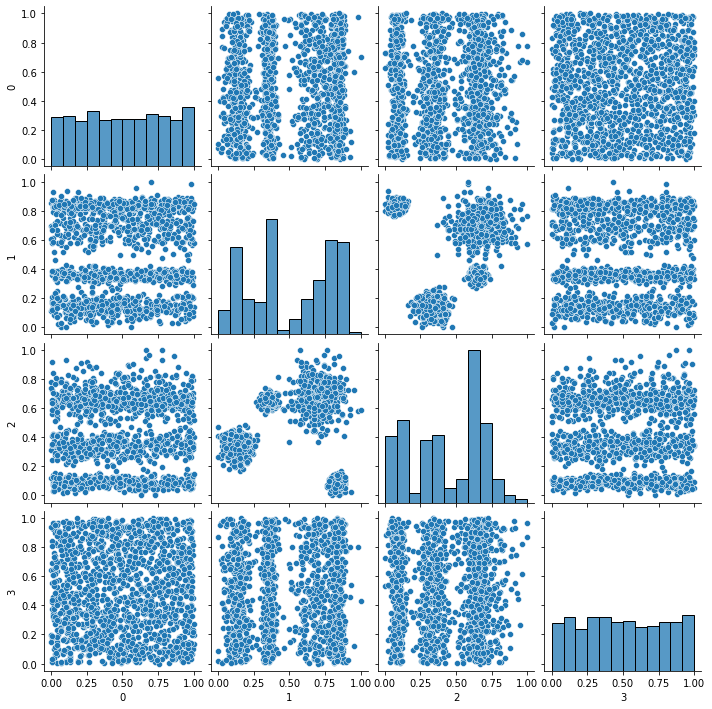

In [9]:
sns.pairplot(df);

The variables 0 and 3 can be dropped because they doesn't seem to be useful to profuce any clustering. They are mainly noise

In [12]:
X = df.drop([0,3],axis =1)

## 3. A clustering chema using a method of your choice exploring a range of parameter values

In [13]:

n_clusters = range(2,11)

silhouette_scores = []

inertia = []

for cluster in  n_clusters:

  km = KMeans(n_clusters = cluster, random_state = random_state)

  y_km = km.fit_predict(X)

  silhouette_scores.append(silhouette_score(X,y_km))
  
  inertia.append(km.inertia_)

#4. Plot the inertia and the silhouette index for the parameter values you examine

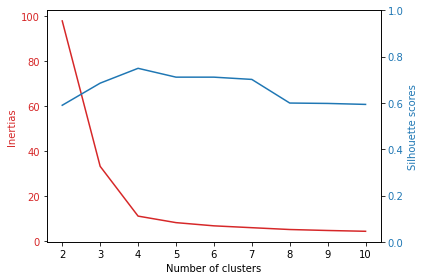

In [15]:
def two_plots(x, y1, y2, xlabel, y1label, y2label):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(y1label, color=color)
    ax1.plot(x, y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(y2label, color=color)  # we already handled the x-label with ax1
    ax2.plot(x, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()


    
two_plots(x=n_clusters, y1=inertia, y2=silhouette_scores
          , xlabel='Number of clusters', y1label='Inertias', y2label='Silhouette scores'
         )

##5. The optiml parameters of your choice




I choose 4 as the best number of clusters because the silhouette has a peack and we are near the elbow for the inertia.

In [16]:
km = KMeans(n_clusters = 4, random_state = random_state)

y_km = km.fit_predict(X)

##6. Do a pairplot of the data using as hue the cluster assignment with the optional parameter

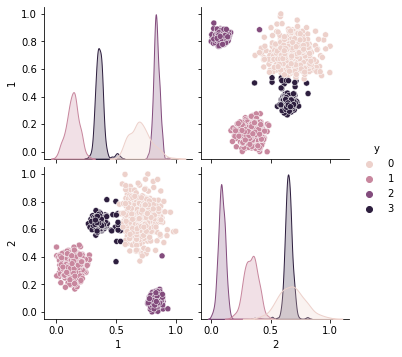

In [17]:
data_f = X
data_f["y"] = y_km
sns.pairplot(data_f,hue = "y")

## 7. A plot of the silhouette index for the data points, groped according to the clusters

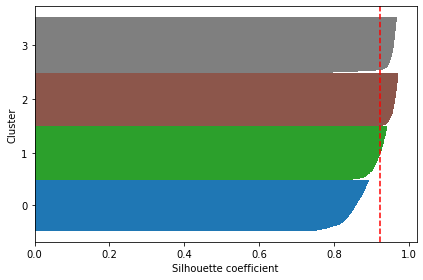

In [18]:
from plot_silhouette import plot_silhouette
from sklearn.metrics import silhouette_samples
plot_silhouette(silhouette_samples(X,y_km),y_km)

The custer with the highest silhouette is the cluster number 3.

##8. A sorted list of the discovered clusters for decresing size

In [19]:
labels = pd.DataFrame(y_km)
counts = pd.DataFrame(labels.value_counts(), columns=['Count']).reset_index()
counts = counts.rename(columns = {0: 'Cluster'})
counts

,Cluster,Count
0,3,390
1,2,376
2,1,375
3,0,359
